# Data Analysis

Author: Juan Manuel Sarmiento

Project: Palmas del Cesar Survey

Created: 2021-05-25

Created: 2016-05-28

Purpose: Data analysis

In [42]:
# Requermientos
import pandas as pd
import numpy as np
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20.0, 10]
plt.style.use('fivethirtyeight')
import re
import seaborn as sns
import string
from pandas.api.types import CategoricalDtype

In [19]:
# Se importa el data frame a la variable surveys
surveys = pd.read_pickle('surveys_df.pkl')

In [20]:
surveys

,Sexo,Edad,Municipio,Departamento,1 ¿Estado civil propietario (a) del predio?,2.1 Edad de la esposa,3. ¿Ocupación de esposa (o) o compañero (o) permanente?,3.1 Otro,4. ¿Número de personas que conforman su núcleo familiar ?,5. Cuántos hijas tiene,...,65. Qué dificultades ha tenido como proveedor de palmas de Cesar S.A:,66. Cuáles son sus necesidades y expectativas en su relación con palmas de Cesar S.A,67. Usted forma parte de una asociación cooperativa o gremio,67.1 Cuál,68. Cuál es su participación en esta asociación cooperativa o miembro. Miembro con voz y voto,68.1 Miembro con voz,68.2 Miembro de Junta directiva,68.3 Cuál,68.4 Cual,68.5 Otros
índice,,,,,,,,,,,,,,,,,,,,,
P-001-LR,0,52,san martin,cesar,soltero,,,,5,1,...,ningu,recibir colaboracion mutua para tener un medio...,si,asociacion de camionetas de servicio espcial atsm,x,,,,,
P-002-WV,0,45,bucaramanga,santander,casad,38,trabaja en actividades diferentes al cultivo d...,,3,1,...,ninguno,"""que se siga brindando el apoyo referente a lo...",no,,,,,,,
P-003-BG,1,55,bucaramanga,santander,viudo,,encargada (o) del hogar,,5,2,...,ningu,asesoria para resembrar la palma cuando sea ne...,no,,,,,,,
P-004-JM,0,62,aguachica,cesar,casad,60,encargada (o) del hogar,,4,1,...,ningu,mas relacion con ellos y con los empleados de ...,no,,,,,,,
P-005-AS,0,54,bucachica,norte de santander,soltero,,encargada (o) del hogar,,,,...,se vendieron semillas regulares,ningu,si,asopalmar,,,,,asociado,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P-031-WP,0,44,bucaramanga,santander,casad,36,,secretaria,3,1,...,ninguno,que continuen con el trabajo y colaborandole a...,si,aceites del magdale medio,,,,,x,accionista
P-032-GR,0,47,san amrtin,cesar,casad,46,encargada (o) del hogar,,4,,...,ningu,que sigan apoyando a los palmicultores y den m...,no,,,,,,,
P-033-OS,1,53,bucaramanga,santander,casad,61,,medico,4,1,...,les han descontado por que el fruto llega verd...,que continuen trabajando por la region y sean ...,no,,,,,,,


In [21]:
# Número de entrevistas
len(surveys)

144

### Gráfico de Barras de edad de palmicultores

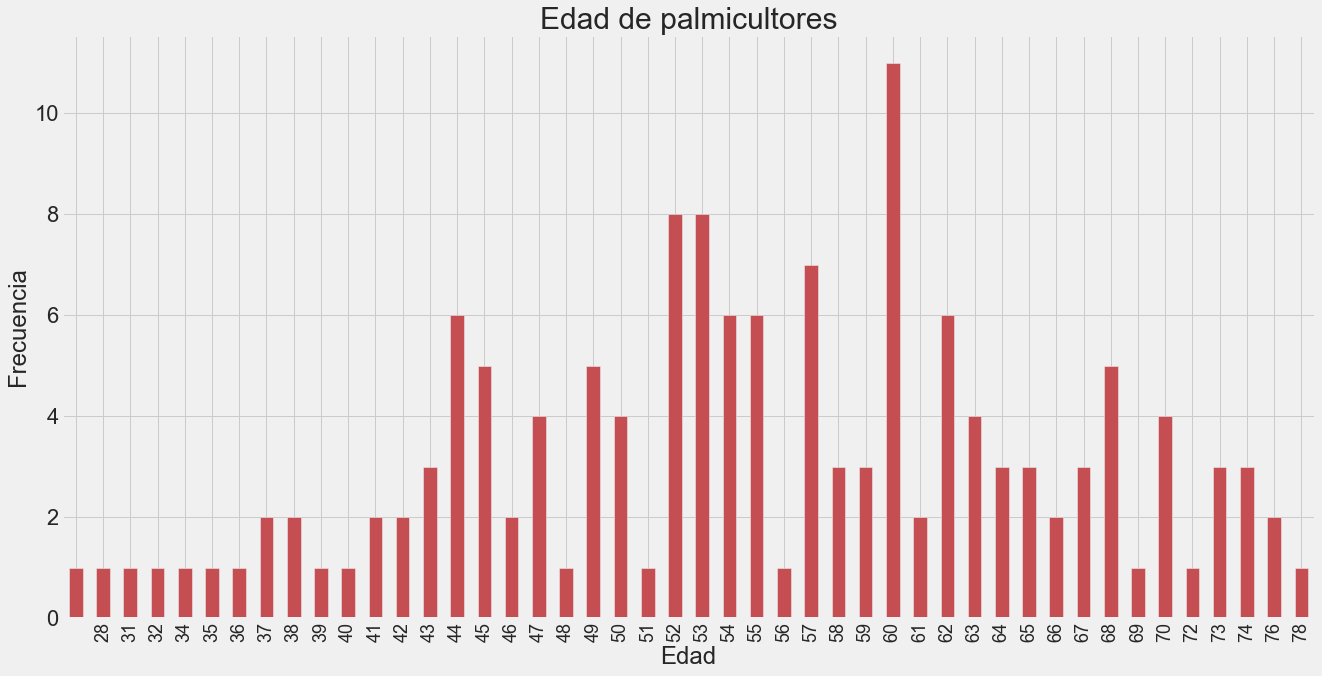

In [56]:
by_edad = surveys.groupby('Edad ')
Edad_count = by_edad['Edad '].agg('count')
Edad_count.plot(kind='bar', color = 'r')
plt.xticks(fontsize=15)
plt.title("Edad de palmicultores", fontdict={'fontsize': 30})
plt.xticks(fontsize=18, ha='center')
plt.ylabel("Frecuencia", fontdict={'fontsize': 24})
plt.xlabel("Edad", fontdict={'fontsize': 24});
plt.savefig('images/edad_palmicultores.png')

### Gráfico de barras de sexo de palmicultores

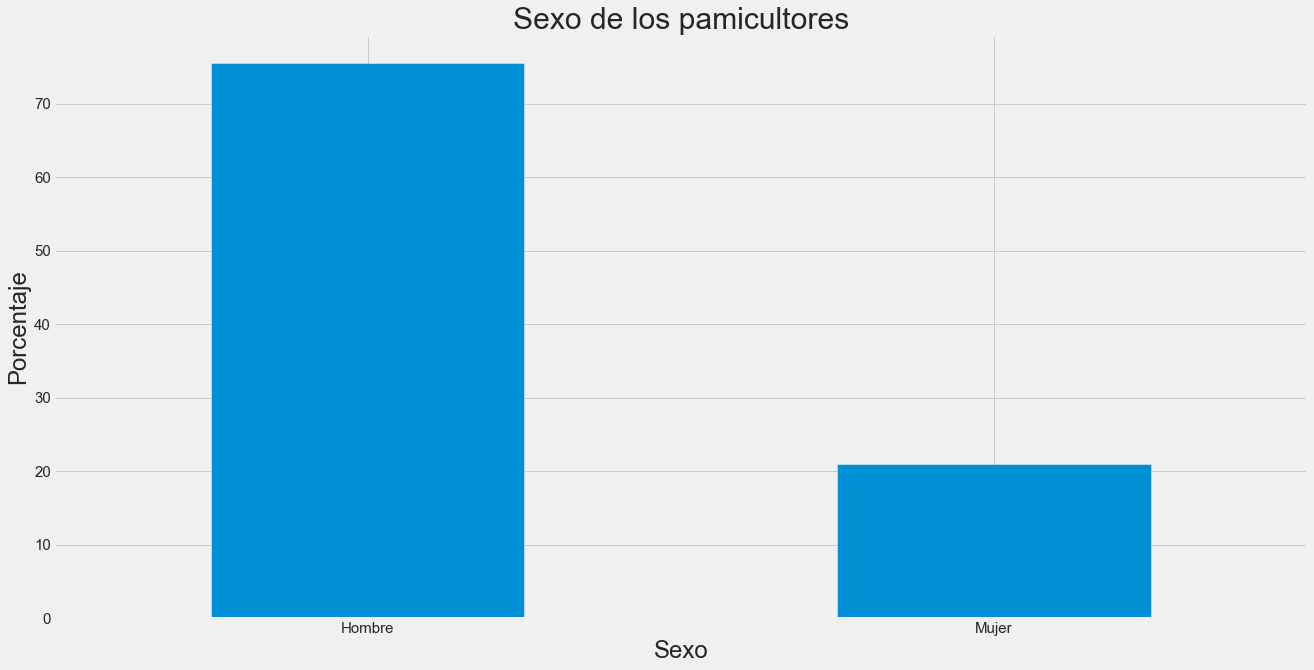

In [57]:
by_sexo = surveys.groupby('Sexo')
sexo_count = by_sexo['Sexo'].agg('count')
sexo_count_percent = sexo_count*100/86
sexo_count_percent.plot(kind='bar')
plt.xticks(np.arange(2), ['Hombre', 'Mujer'],fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.title("Sexo de los pamicultores", fontdict={'fontsize': 30})
plt.ylabel("Porcentaje", fontdict={'fontsize': 24})
plt.xlabel("Sexo", fontdict={'fontsize': 24});
plt.savefig('images/sexo_palmicultores.png')

### Histograma de número de personas por núcleo familiar

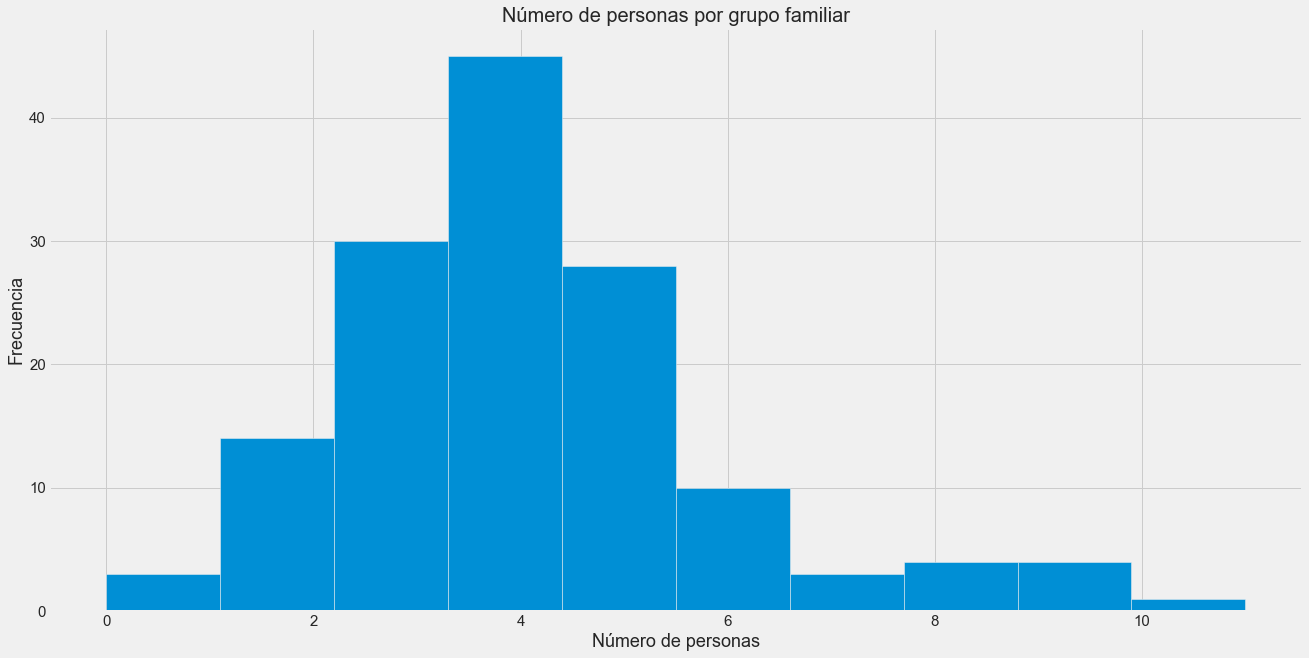

In [58]:
surveys['4. ¿Número de personas que conforman su núcleo familiar  ? '] = pd.to_numeric(surveys['4. ¿Número de personas que conforman su núcleo familiar  ? '], errors='coerce')
surveys['4. ¿Número de personas que conforman su núcleo familiar  ? '].astype(float).plot.hist()
plt.title("Número de personas por grupo familiar", fontdict={'fontsize': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Frecuencia", fontdict={'fontsize': 18})
plt.xlabel("Número de personas", fontdict={'fontsize': 18});
plt.savefig('images/nucleofam_palmicultores.png')

### Histograma de número total de hijos

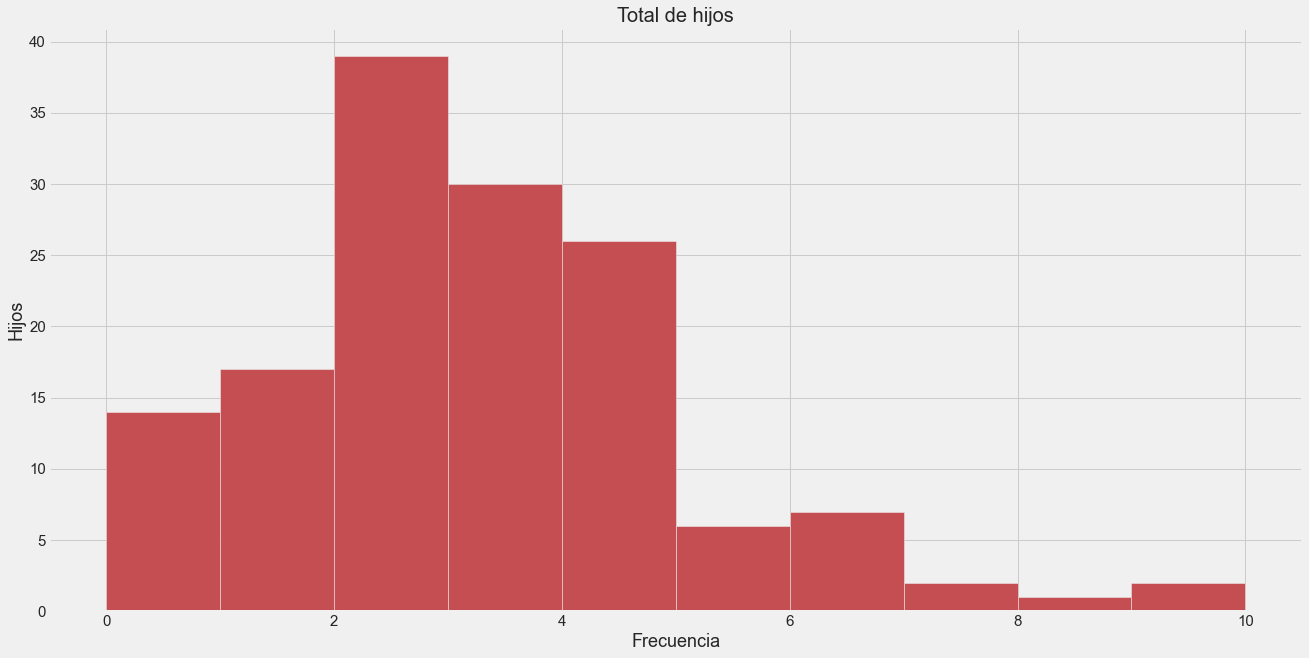

In [59]:
surveys['5.2 Total hijos '].plot.hist(color = 'r')
plt.title("Total de hijos", fontdict={'fontsize': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Hijos", fontdict={'fontsize': 18})
plt.xlabel("Frecuencia", fontdict={'fontsize': 18});
plt.savefig('images/hijos_palmicultores.png')

### Gráfico circular sobre lugar de residencia de los palmicultores

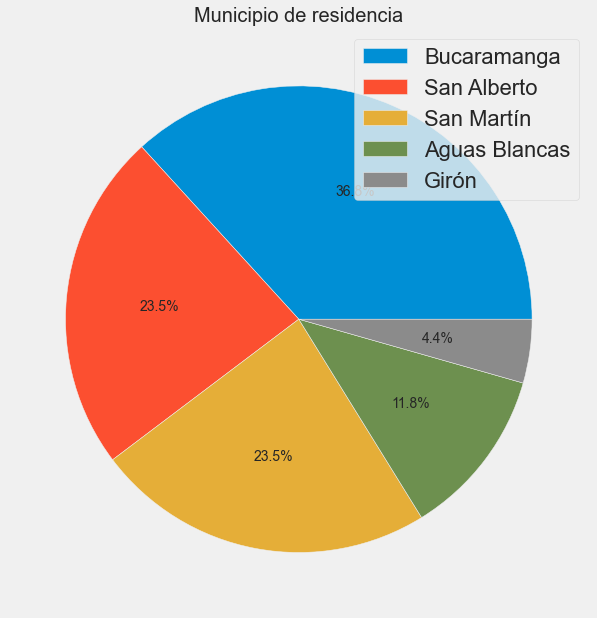

In [60]:
by_mun = surveys['20.1 Donde vive '].value_counts()
by_mun = by_mun.drop(by_mun.index[3])
by_mun = by_mun.drop(by_mun.index[5:])
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(absolute)
fig = plt.figure(figsize =(10, 10))
plt.pie(by_mun, autopct='%1.1f%%' )
plt.title("Municipio de residencia", fontdict={'fontsize': 20})
labels = [r'Bucaramanga', r'San Alberto', r'San Martín', r'Aguas Blancas', r'Girón']
plt.legend(labels, loc="best")
plt.show;
plt.savefig('images/residen_palmicultores.png')

### Gráfico de torta sobre tenencia de vivienda propia

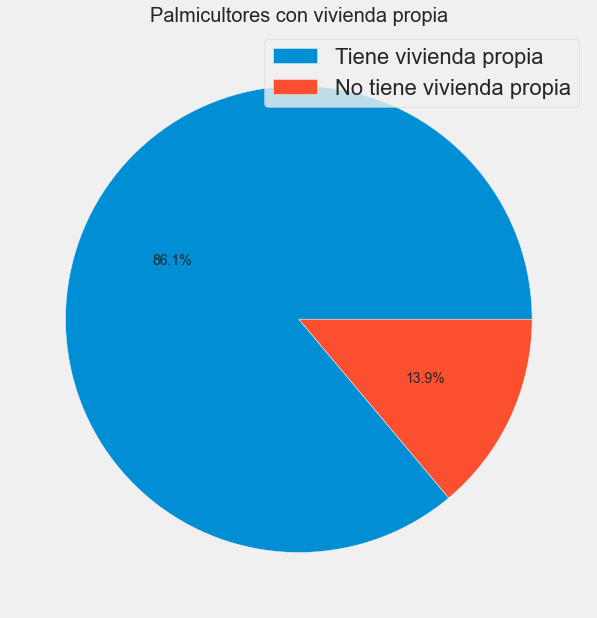

<Figure size 1440x720 with 0 Axes>

In [61]:
by_viv = surveys['20. Tiene vivienda propia '].value_counts()
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(absolute)
fig = plt.figure(figsize =(10, 10))
plt.pie(by_viv, autopct='%1.1f%%' )
plt.title("Palmicultores con vivienda propia", fontdict={'fontsize': 20})
labels = [r'Tiene vivienda propia', r'No tiene vivienda propia']
plt.legend(labels, loc="best")
plt.show()
plt.savefig('images/vivprop_palmicultores.png')

### Gráfico de barras sobre tenencia de servicios públicos 

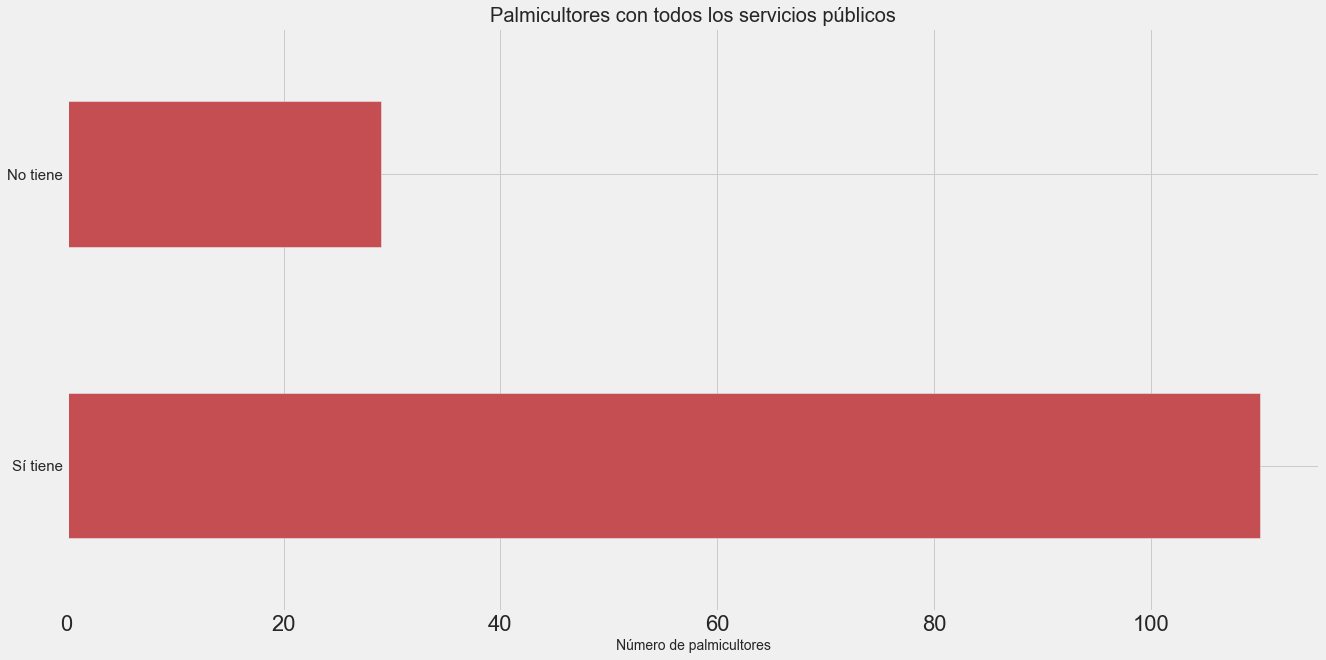

In [62]:
by_serv = surveys['22. La vivienda cuenta con todos los servicios públicos '].value_counts()
by_serv = by_serv.drop(by_serv.index[2])
by_serv.plot.barh(color = 'r')
plt.yticks(np.arange(2), ['Sí tiene', 'No tiene'],fontsize=15,rotation=0)
plt.title("Palmicultores con todos los servicios públicos", fontdict={'fontsize': 20})
plt.xlabel("Número de palmicultores", fontdict={'fontsize': 14});
plt.savefig('images/servpub_palmicultores.png')

### Gráfico circular sobre régimen de salud de palmicultores

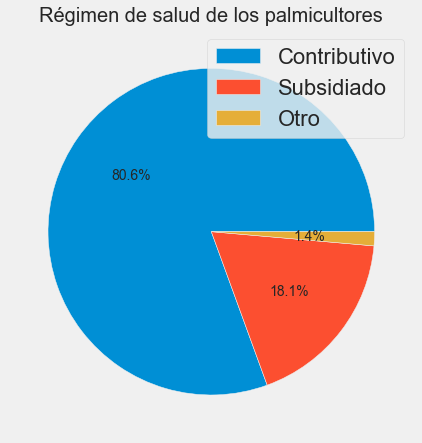

<Figure size 1440x720 with 0 Axes>

In [63]:
by_sub = surveys['17. Tipo de régimen de seguridad social que usted tiene Subsidiado '].value_counts()
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(absolute)
fig = plt.figure(figsize =(10, 7))
plt.pie(by_sub, autopct='%1.1f%%' )
plt.title("Régimen de salud de los palmicultores", fontdict={'fontsize': 20})
labels = [r'Contributivo', r'Subsidiado', r'Otro']
plt.legend(labels, loc="best")
plt.show()
plt.savefig('images/regsalud_palmicultores.png')

### Gráfico de barras con nivel educativo por sexo

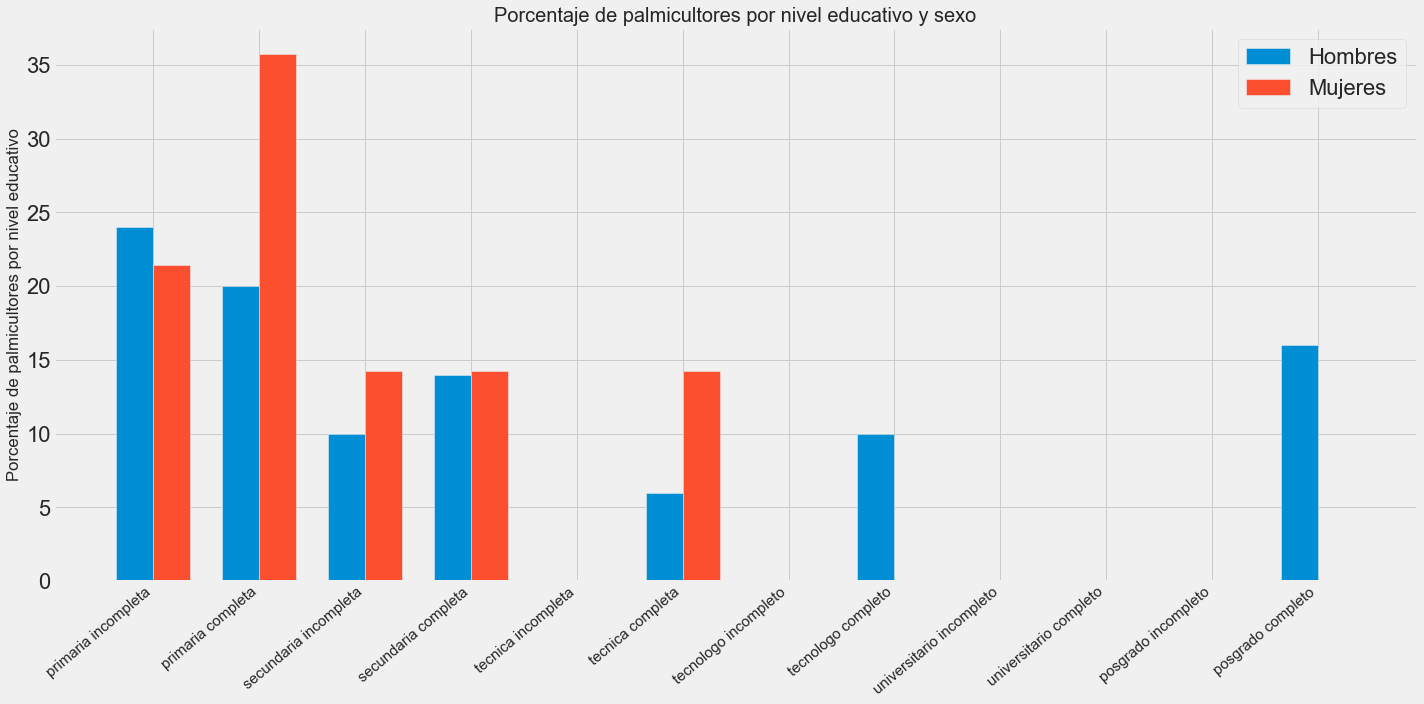

<Figure size 1440x720 with 0 Axes>

In [64]:
# Establecimiento de etiquetas
labels = ['primaria incompleta', 'primaria completa', 'secundaria incompleta', 'secundaria completa', 'tecnica incompleta', 'tecnica completa', 'tecnologo incompleto', 'tecnologo completo', 'universitario incompleto', 'universitario completo', 'posgrado incompleto', 'posgrado completo']
#Establecimiento de conteo y porcentaje según sexo
sex_edu = surveys.groupby(['14. Grado escolaridad propietario (a) ', 'Sexo'])
sexo_count = sex_edu['14. Grado escolaridad propietario (a) '].agg('count')
sexo_count
sexo_pcts = sexo_count.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))
aux = sexo_pcts.tolist()
men_per = aux[::2]
women_per = aux[1::2]

# Ancho de la barra 
x = np.arange(len(women_per)) 
width = 0.35  

#Creación de la figura
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_per, width, label='Hombres')
rects2 = ax.bar(x + width/2, women_per, width, label='Mujeres')

# Agregar títulos, ticks y legenda
ax.set_ylabel('Porcentaje de palmicultores por nivel educativo')
ax.set_title('Porcentaje de palmicultores por nivel educativo y sexo', fontdict={'fontsize': 20})

plt.xticks(np.arange(12), ['primaria incompleta', 'primaria completa', 'secundaria incompleta', 'secundaria completa', 'tecnica incompleta', 'tecnica completa', 'tecnologo incompleto', 'tecnologo completo', 'universitario incompleto','universitario completo', 'posgrado incompleto', 'posgrado completo'],fontsize=15,rotation=40, horizontalalignment="right")

ax.legend()

plt.tight_layout()

plt.show()
plt.savefig('images/educsex_palmicultores.png')

### Géfico cricular de Palmicultores víctimas

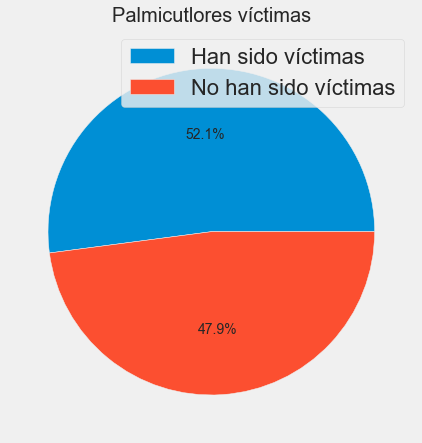

<Figure size 1440x720 with 0 Axes>

In [65]:
by_viole = surveys['27. Usted o su familia han sido víctima de hechos relacionados con el conflicto armando o grupos al margen '].value_counts()
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(absolute)
fig = plt.figure(figsize =(10, 7))
plt.pie(by_viole, autopct='%1.1f%%' )
plt.title("Palmicutlores víctimas", fontdict={'fontsize': 20})
labels = [r'Han sido víctimas', r'No han sido víctimas']
plt.legend(labels, loc="best")
plt.show()
plt.savefig('images/victimas_palmicultores.png')

### Gráfico de dispersión de total de hijos y nivel educativo

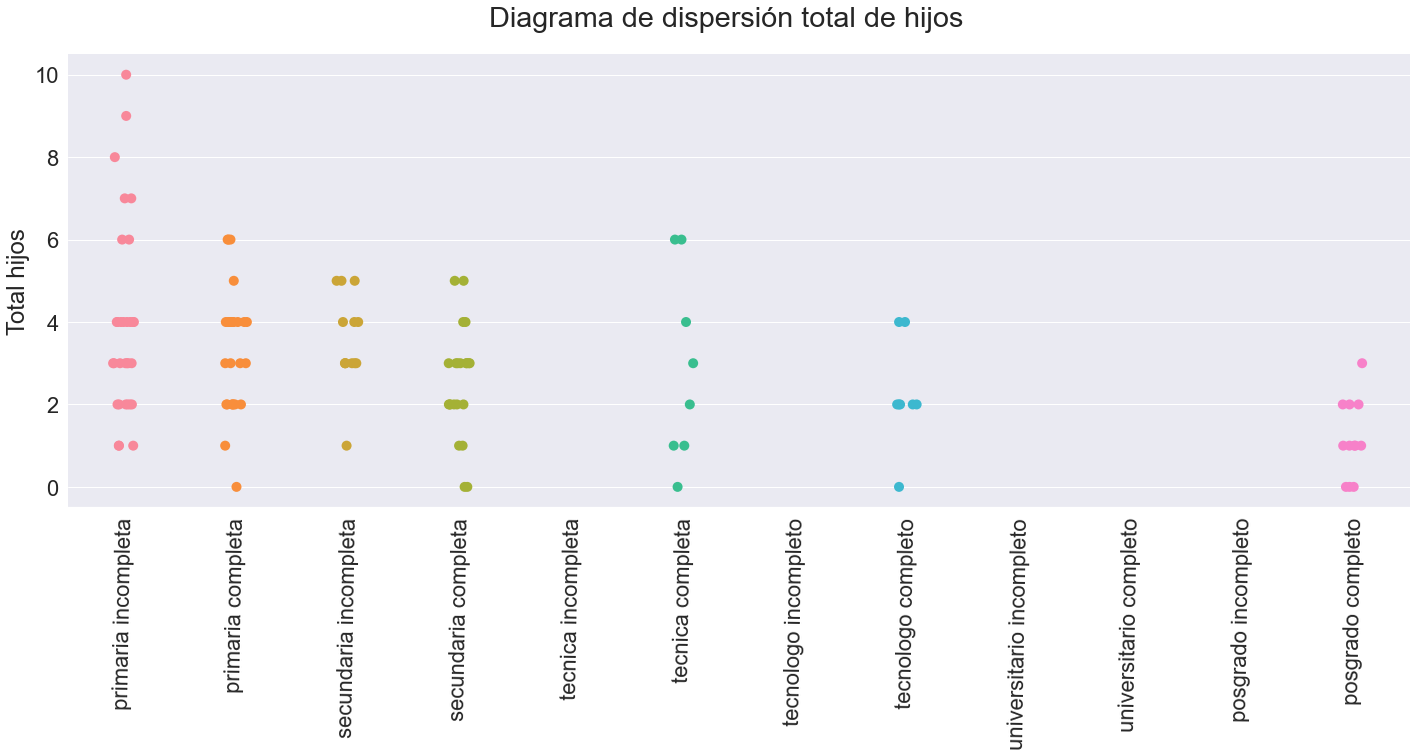

In [66]:
# Se crean las categorías ordenadas
ordered_edulevel = ['primaria incompleta', 'primaria completa', 'secundaria incompleta',
                    'secundaria completa', 'tecnica incompleta', 'tecnica completa',
                   'tecnologo incompleto', 'tecnologo completo', 'universitario incompleto',
                   'universitario completo', 'posgrado incompleto', 'posgrado completo']
# Se vuelve la variable categórica
surveys['14. Grado escolaridad propietario (a) '] = pd.Categorical(surveys['14. Grado escolaridad propietario (a) '],categories=ordered_edulevel,ordered=True)
# Se crea el gráfico de dispersión
sns.set_style(style="ticks")
sns.set(font_scale=2)
g = sns.catplot(x='14. Grado escolaridad propietario (a) ', y='5.2 Total hijos ', data=surveys, height=8.27, aspect=20.7/8.27, s = 10)
g.set_axis_labels("", "Total hijos")
g.set_titles("{col_name} {col_var}")
g.despine(left=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Diagrama de dispersión total de hijos')
g.set_xticklabels(rotation=89)
plt.savefig('images/disper_palmicultores.png')

### Gráfico de barras de palmicultores con actividad adicional a la palma

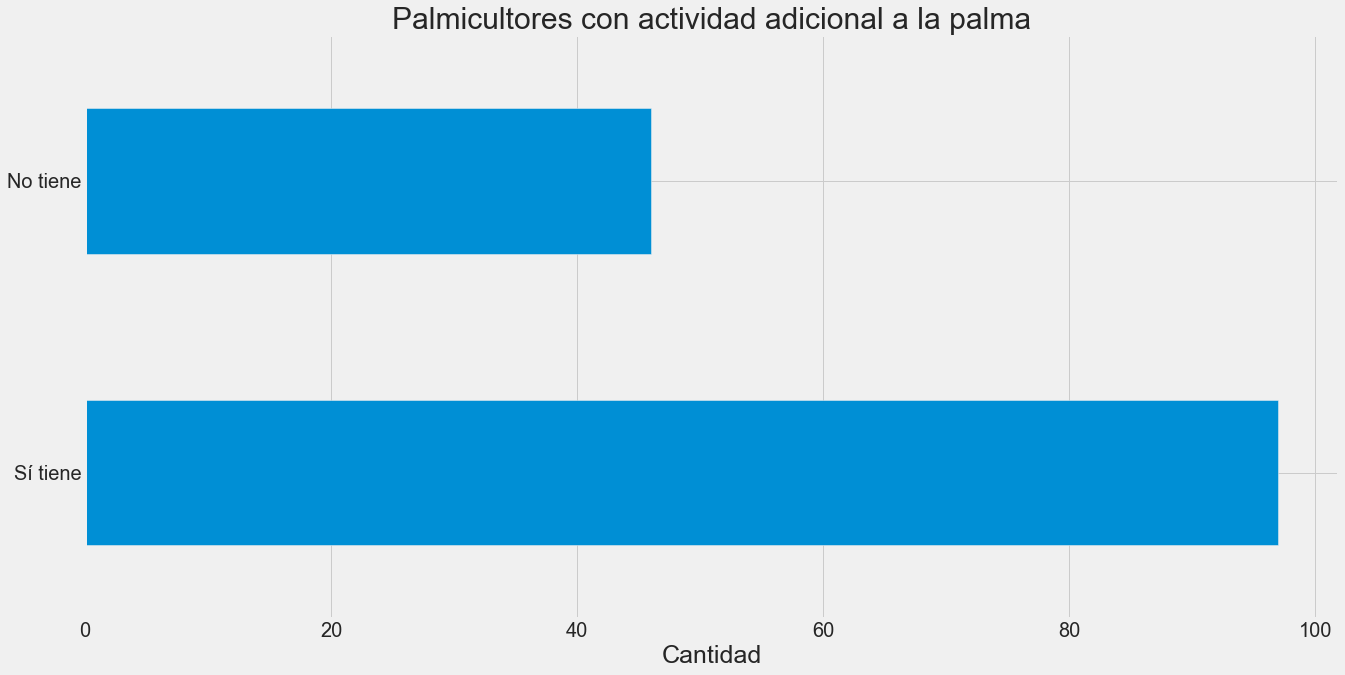

In [67]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [20.0, 10]
by_act = surveys['32. Tiene otra actividad económica adicional a la palma '].value_counts()
by_act = by_act.drop(by_act.index[2])
by_act.plot.barh()
plt.title("Palmicultores con actividad adicional a la palma", fontdict={'fontsize': 30})
plt.yticks(np.arange(2), ['Sí tiene', 'No tiene'],fontsize=20,rotation=0)
plt.xticks(fontsize=20,rotation=0)
plt.xlabel("Cantidad", fontdict={'fontsize': 25});
plt.savefig('images/actadic_palmicultores.png')

### Gráfico de barras de palmicultores que desean realizar una actividad adicional a la palma

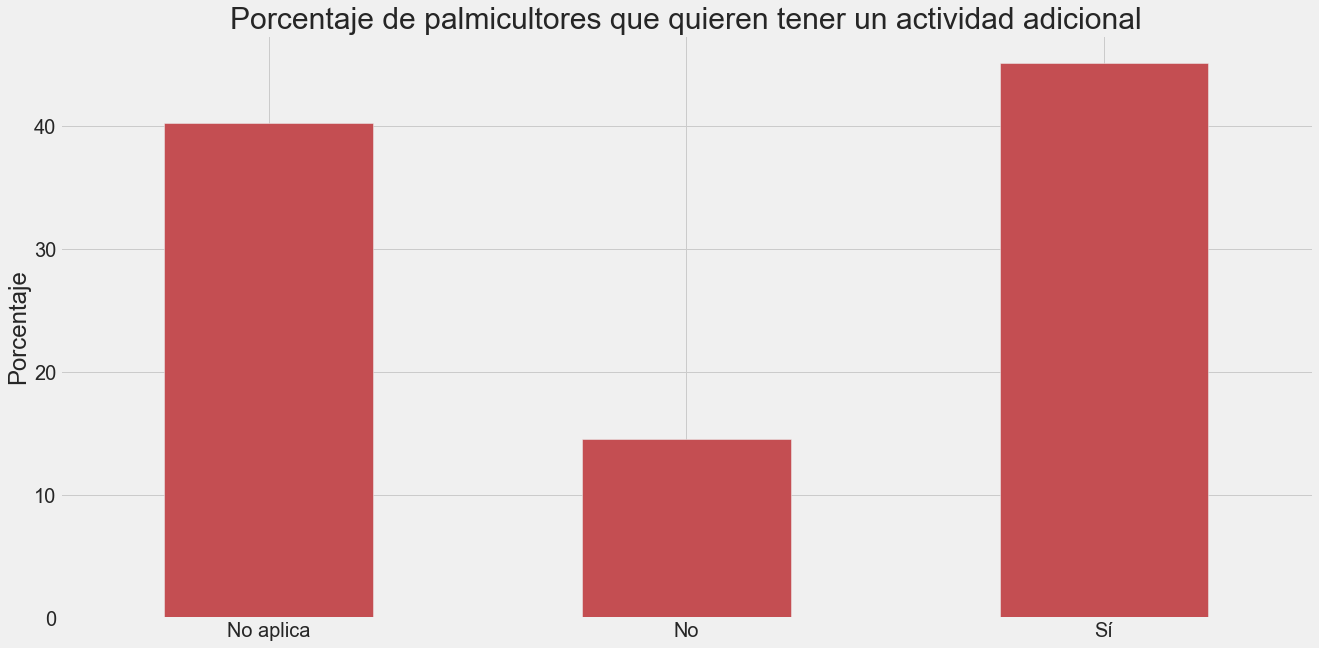

In [68]:
by_gust = surveys.groupby('33. Si su respuesta es no. ¿Le gustaría realizar otra actividad económica diferente a la palmicultura? ')
act_gust = by_gust['33. Si su respuesta es no. ¿Le gustaría realizar otra actividad económica diferente a la palmicultura? '].agg('count')
gust_count_percent = act_gust*100/144
gust_count_percent.plot(kind='bar', color='r')
plt.xticks(np.arange(3), ['No aplica', 'No', 'Sí'], fontsize=20,rotation=0)
plt.yticks(fontsize=20)
plt.title("Porcentaje de palmicultores que quieren tener un actividad adicional", fontdict={'fontsize': 30})
plt.ylabel("Porcentaje", fontdict={'fontsize': 24})
plt.xlabel("", fontdict={'fontsize': 24});
plt.savefig('images/quieract_palmicultores.png')

--------------------------------------------